<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

In [ ]:
library(rethinking)

# Chapter 5

## Easy

### 5E1
#### Question
Which of the linear models below are multiple linear regressions?
1.   $\mu_i = \alpha + \beta x_i$
2.   $\mu_i = \beta_x x_i + \beta_z z_i$
3.   $\mu_i = \alpha + \beta (x_i - z_i)$
4.   $\mu_i = \alpha + \beta_x x_i + \beta_z z_i$

#### Answer
In order to be a *multiple linear regression*, an equation needs to regress an outcome, e.g., $\mu$, onto two or more coefficient-predictor pairs, e.g., $\beta x$.

Looking at our equations, all four regress an outcome $\mu$ onto predictor variables, but only (2) and (4) regress $\mu$ onto two or more coefficient-predictor pairs ($\beta_x x_i$ and $\beta_z z_i$).  

The $\alpha$ terms do not count as coefficient-predictor pairs since they don't have a predictor variable (like $x$) associated with them--so (1) is out.  

In (3), there *are* two predictor variables ($x$ and $z$), but they are combined as a difference that can be rewritten as a single variable like $x_i - z_i = w_i$ such that the entire equation could be $\mu_i = \alpha + \beta w_i$.

### 5E2
#### Question
Write down a multiple regression to evaluate the claim: *Animal diversity is linearly related to latitude, but only after controlling for plant diversity.* You just need to write down the model definition.

#### Answer
First, we need an outcome.  Call it $A_i$ for *animal diversity*.  Maybe this is the number of species in a given area of land.

Since we're dealing with normal linear regression, which assumes that the outcome is normally distributed, we presume $A_i \sim Normal(\mu_i, \sigma)$.

Now we need to regress $A_i$ on *lattitude* $L_i$, and also controlling for *plant diversity* $P_i$.  This could look like $\beta_L L + \beta_P P$.

The question does not ask us to consider the possibility that $A$ is affected by $L$ differently for different values of $P$--e.g., perhaps animal diversity is less affected by lattitude at greater levels of plant diversity.  This type of relationship is described by an **interaction**, which is covered later.  But just for fun, I'll add this term $\beta_{LP}(L*P)$

Finally, we should consider including an intercept $\alpha$.  In this example, we can think of $\alpha$ as the value of $A_i$ when both lattitude is 0 (at the equator) and there are no plants in an area.

So altogether, our linear model could look like:

*   $A_i \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_L L + \beta_P P + \beta_{LP}(L*P)$

We'd need some priors to make a fully-fledged Bayesian model, but we're ignoring that here.

Before ending this question, I can't help but point out an assumption in our model that seems possibly inappropriate.  That is this: $A_i$ may not be distributed as a normal distribution.  More correctly: after accounting for $L_i$ and $P_i$, the residual of $A_i$ may not be distributed as a normal distribution.  Why not?  Because a normal distribution permits negative values; a normally-distributed $A_i$ implies that less-than-zero animals may inhabit an area.

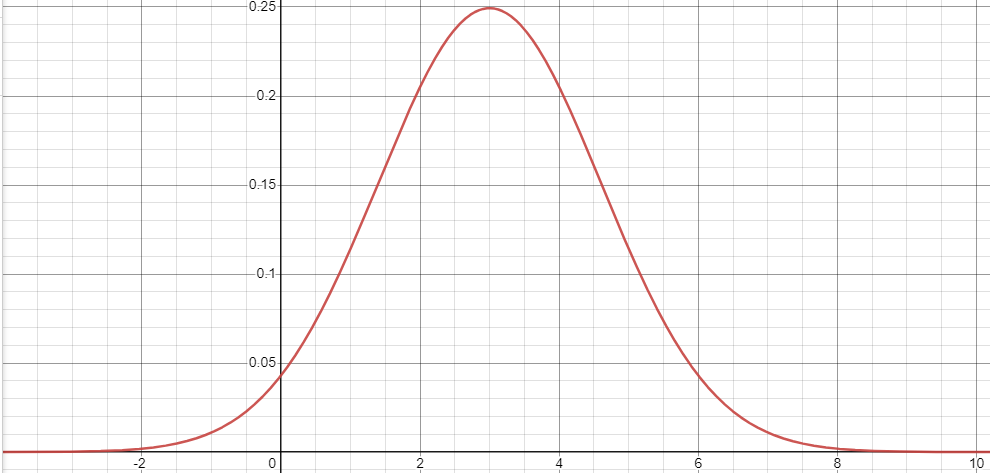

(Image made in desmos)

We could get around this by modeling $log(A_i) \sim Normal(\mu_i, \sigma)$ instead.  Alternatively, and preferrably, we might model $A$ as a non-normal distribution that cannot be negative.  We'll get to that later under the topic of **generalized linear models**.

### 5E3
#### Question
Write down a multiple regression to evaluate the claim: Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree. Write down the model definition and indicate which side of zero each slope parameter should be on.

#### Answer
##### Model Definition
Following the same approach in 5E2, let's first define our outcome.  Here, it is *time to PhD* $T$.  Again, we're working with normal linear regression, so we'll assume that $T \sim Normal(\mu_i, \sigma)$.  But also like 5E2, assuming a normal distribution may not be ideal since it permits negative time to PhD; we'll ignore that and charge ahead until we learn about generalized linear models.

We are regressing (the expected value of) $T$ on both *funding* $F$ and *size of lab* $S$: $\mu = \alpha + \beta_F F_i + \beta_S S_i$.  We might additionally consider an interaction $\beta_{FS} (F_i * S_i)$.

So our overall model, without priors, looks like:
*   $T \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_F F_i + \beta_S S_i$

or
*   $T \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_F F_i + \beta_S S_i + \beta_{FS} (F_i * S_i)$


##### $\beta$ values
Next, the question stipulates that *neither $F$ nor $S$ alone are good predictors of $T$, but that their combined relationship is positively associated with $T$*.  With that information, we are to determine which of $\beta_F$ and $\beta_S$ (and possibly $\beta_{FS})$ are positive values.

I think the wording here is a bit unclear.  Firstly, my intuitions are violated by the question.  The problem asserts that funding and lab size predict more time to complete a PhD...which makes thinking about the problem confusing.  So to make it simpler, I'm going to assume that $T$ actually represents something like *time less than 10 years to complete a PhD*, so that $F$ and $S$ increase the time saved (i.e., decrease total time to PhD).

Next, what does it mean for a predictor to be a *poor* predictor?  And what does it mean to consider the variables *together*?  I think that a poor predictor is a predictor, either $F$ or $S$, that has a $\beta$ coefficient (that is, the association between the predictor and the outcome) with crediibility intervals that semi-evenly straddle 0 **in a single-explanatory-variable regression** --$\mu_i = \alpha + \beta_F F_i$  or $\mu_i = \alpha + \beta_S S_i$.  These univariate regressions are what "considered alone" means; thus, "considered together" means combining them in a multivariate regression $\mu = \alpha + \beta_F F_i + \beta_S S_i$ (ignoring the interaction term for now).

In this case, it raises the question "How can neither $F$ nor $S$ have no association with $T$ in univariate regression, but both have positive associations in multivariate regression?".

The answer could be that $F$ and $S$ are negatively associated: if larger labs tended be less funded, or well-funded labs had less students.  This also violates my intuitions, so let's take $F$ to be *funding per student*.  Now a negative relationship between $F$ and $S$ makes sense; more students in a lab results in less funding per student.

Then, a univariate regression, say $\mu_i = \alpha + \beta_F F_i$, the unacknowledged variable, $S$ would be hiding in the data--labs with more funding would have fewer students, thus decreasing $T$ (possibly due to an impoverished learning environment) even though we didn't account for it in the regression.  Similarly for $\mu_i = \alpha + \beta_S S_i$, $F$ would hide in the data and covertly decrease $T$.  (This might be called the **missing-variable bias**)

Things get squirrelly if I allow an interaction term $\mu_i = \alpha + \beta_F F_i + \beta_S S_i + \beta_{FS} (F_i * S_i)$.  If I take "consider variables together" to refer to the interaction $\beta_{FS} (F_i * S_i)$, then $\beta_F$ and $\beta_S$ can be either positive or negative because only the interaction is the consideration of their combination.

### 5E4
#### Question
Suppose you have a single categorical predictor with 4 levels (unique values), labeled $A$, $B$, $C$,  and $D$. Let $A_i$ be an indicator variable that is 1 where case $i$ is in category $A$. Also suppose $B_i$, $C_i$,  and $D_i$ for the other categories. Now which of the following linear models are inferentially equivalent  ways to include the categorical variable in a regression? Models are inferentially equivalent when it’s  possible to compute one posterior distribution from the posterior distribution of another model.
1.   $\mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_D D_i$
2.   $\mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_C C_i + \beta_D D_i$
3.   $\mu_i = \alpha + \beta_B B_i + \beta_C C_i + \beta_D D_i$
4.   $\mu_i = \alpha_A A_i + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$
5.   $\mu_i = \alpha_A(1-B_i-C_i-D_i) + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$

#### Answer
It's important to keep in mind that $A$, $B$, $C$, and $D$ are different categories of the same thing--like color of shirts: red, yellow, blue, green.  Two tacit assumptions in this question are that the a) every datapoint is one of the 4 categories (there is no category $E$ or purple shirt, for instance) and b) no datapoint is more than 1 category (e.g., all shirts are solid colors--no stripes or polka dots).  In regression, it is common (though not necessary, as we'll see in later chapters) to *binarize* (if that's a word) categorical variables.  "Is the shirt red? yes=1, no=0.  Is the shirt yellow? yes=1, no=0.  etc."

Starting from regression (1).  Does this regression capture all 4 categories?  You might initially think not since $C$ is missing.  However, it *does* contain an intercept $\alpha$.  This intercept is the value when all other variables are 0.  So here, $\alpha$ represents the value of $\mu$ when all but $C$ are 0.

Is (2) the same as (1)?  Regression (2) contains terms for each category, plus an additional $\alpha$.  So while this data can model the 4 categories in our data, it is estimating an additional parameter.  Thus (1) and (2) are not equal.

Now to (3).  Is (3) equivalent to either (1) or (2).  Whereas regression (1) omitted $C$, regression (3) included $C$ but omits $A$; both (1) and (3) also contain an intercept $\alpha$; the only difference is that, whereas $\alpha$ represents $C$ in (1), $\alpha$ represents $A$ in (3).  By the same logic used for (1), (3) can handle all 4 categories.  (1) and (3) also have the same number of parameters.  We will get the same posterior values for (1) and (3), so (1) and (3) are equivalent.

Regression (4) contains all $\alpha$'s as coefficients.  Even though $\alpha$ is generally used as an intercept and and $\beta$ as a slope (coefficient for predictor-variable data), these are just labels.  So don't be put off by the change in symbolism.  We see that (4) has a term for each category, this time omitting an intercept.  Assuming that every datapoint will be either $A$, $B$, $C$, or $D$, (4) is equivalent to both (1) and (3).

Finally, regression (5) has terms for each category.  But the term for $A$ is weird: $\alpha_A(1-B_i-C_i-D_i)$.  But let's think it through.  This term is only non-zero when $B$, $C$, and $D$ are 0; in other words, when the datapoint category is $A$.  Again, we have terms for each category and the same number of parameters as (1), (3), and (4).

So all but (2) are equivalent.